In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread('images/rice.png', cv.IMREAD_GRAYSCALE)

In [3]:
H, W = image.shape

In [4]:
# تقسیم تصویر به چهار بخش
image1 = image[:H//2, :W//2]
image2 = image[:H//2, (W//2):]
image3 = image[(H//2):, :W//2]
image4 = image[(H//2):, (W//2):]
images4 = [image1, image2, image3, image4]

# تقسیم تصویر به دو بخش
image5 = image[:H//2, :]
image6 = image[(H//2):, :]
images2 = [image5, image6]


In [5]:
# انتخاب میانگین به عنوان آستانه برای هر بخش چهارگانه
TH4 = []
for i in range(4):
    th = np.mean(images4[i])
    TH4.append(th)

bin_images4 = []
for i in range(4):
    bin_image = (images4[i] > TH4[i]).astype(np.bool_)
    bin_images4.append(bin_image)

Bin_image4 = np.zeros_like(image)
Bin_image4[:H//2, :W//2] = bin_images4[0]
Bin_image4[:H//2, (W//2):] = bin_images4[1]
Bin_image4[(H//2):, :W//2] = bin_images4[2]
Bin_image4[(H//2):, (W//2):] = bin_images4[3]


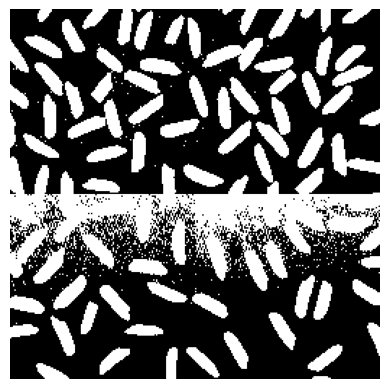

In [6]:
plt.imshow(Bin_image4, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
# انتخاب میانگین به عنوان آستانه برای هر بخش دوگانه
TH2 = []
for i in range(2):
    th = np.mean(images2[i])
    TH2.append(th)

bin_images2 = []
for i in range(2):
    bin_image = (images2[i] > TH2[i]).astype(np.bool_)
    bin_images2.append(bin_image)

Bin_image2 = np.zeros_like(image)
Bin_image2[:H//2, :] = bin_images2[0]
Bin_image2[(H//2):, :] = bin_images2[1]


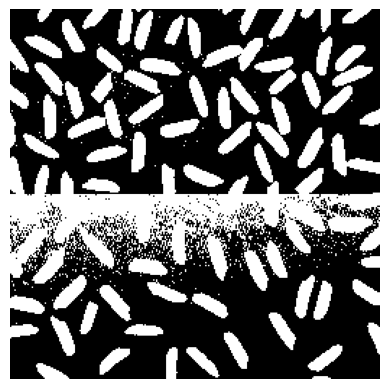

In [8]:
plt.imshow(Bin_image2, cmap='gray')
plt.axis('off')
plt.show()


In [9]:
# آستانه‌یابی وفقی با روش‌های مختلف
opencv_thresh_mean = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 207, 2)
opencv_thresh_gaussian = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 207, 2)


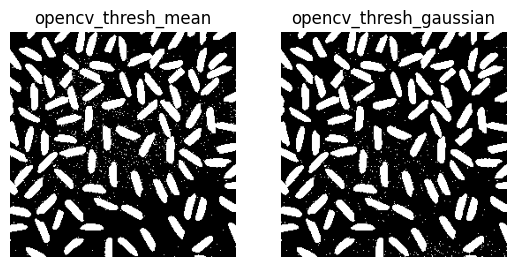

In [10]:
plt.subplot(1, 2, 1)
plt.title('opencv_thresh_mean')
plt.imshow(opencv_thresh_mean, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('opencv_thresh_gaussian')
plt.imshow(opencv_thresh_gaussian, cmap='gray')
plt.axis('off')

plt.show()
